# $Explore$ $Zillow$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import scipy.stats as stats


import wrangle_zillow as w
import env

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
### 2. Answer those questions through a mix of statistical tests and visualizations.

In [2]:
df = w.get_zillow_data()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,log_error,transaction_date,aircondition,architectural_style,bulding_class,heat_systems,land_use,story,construction_type
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [4]:
train, validate, test = w.split_data(df)

<AxesSubplot:xlabel='log_error', ylabel='Count'>

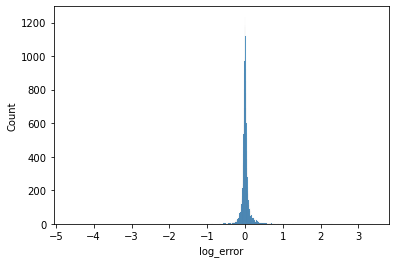

In [6]:
sns.histplot(train['log_error'])

# Question 1: Is logerror significantly diffirent for properties in LA County vs Orange County vs Venture County?

<AxesSubplot:xlabel='fips', ylabel='log_error'>

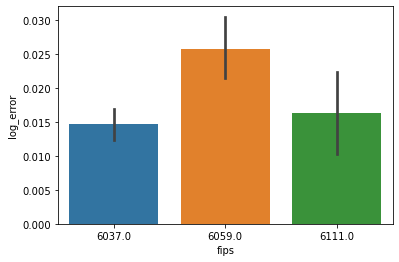

In [5]:
sns.barplot(x='fips',y='log_error', data = train)

In [7]:
train.fips.value_counts()

6037.0    18895
6059.0     7904
6111.0     2499
Name: fips, dtype: int64

In [14]:
stat, p_value = stats.levene(train[train.fips==6037.0].log_error, 
                             train[train.fips==6059.0].log_error,
                             train[train.fips== 6111.0].log_error)
stat, p_value

(19.276877202747134, 4.301923318602041e-09)

$H_0$: Log_error means are the same for all 3 counties

$H_a$: Log_error means are not all equal for all 3 counties

In [15]:
f, p = stats.f_oneway(train[train.fips==6037.0].log_error, 
                             train[train.fips==6059.0].log_error,
                             train[train.fips== 6111.0].log_error)
f, p

(11.711290302540345, 8.239169872164534e-06)

**We fail to reject the null hypothesis, therefore there is evidence to support that log_error mean for all 3 counties is not all equal.**

# Question 2: Is logerror significantly different for properties with exactly 3 bedrooms, less than 3 bedrooms, more than 3 bedrooms?

In [41]:
train.bedroomcnt.value_counts().sort_values()

14.0        1
10.0        2
9.0         5
8.0        14
7.0        52
0.0        69
1.0       355
6.0       382
5.0      2208
2.0      4658
4.0      8578
3.0     12974
Name: bedroomcnt, dtype: int64

In [24]:
# create age bins bedrooms
train['bed_bins'] = pd.cut(train.bedroomcnt, [0,2.99,3, 14],labels = ['beds_lessthan_3', 'beds_equal_3','beds'])
    
train.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,log_error,transaction_date,aircondition,architectural_style,bulding_class,heat_systems,land_use,story,construction_type,bed_bins
32187,608625,14287348,5.0,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,-0.002954,2017-06-19,None,NaN,NaN,Forced air,Single Family Residential,NaN,NaN,beds_equal_3
9581,2918772,14051217,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,...,0.006747,2017-03-03,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,beds_morethan_3
5498,2421709,12048802,NaN,NaN,NaN,3.0,4.0,NaN,7.0,3.0,...,-0.000007,2017-02-07,NaN,NaN,NaN,Solar,Single Family Residential,NaN,NaN,beds_morethan_3
34024,1074511,17237439,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,0.104900,2017-06-26,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,beds_equal_3
34547,1592723,14207254,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,...,-0.012729,2017-06-28,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,beds_morethan_3


In [27]:
train.bed_bins.value_counts()

beds_equal_3       12974
beds_morethan_3    11242
beds_lessthan_3     5013
Name: bed_bins, dtype: int64

<AxesSubplot:xlabel='bed_bins', ylabel='log_error'>

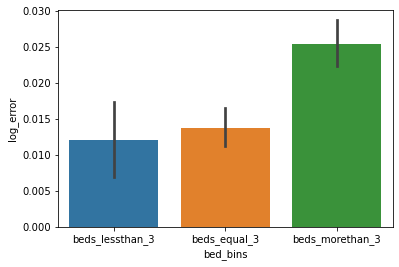

In [25]:
sns.barplot(x='bed_bins',y='log_error', data = train)

In [28]:
stat, p_value = stats.levene(train[train.bed_bins=='beds_equal_3'].log_error, 
                             train[train.bed_bins=='beds_morethan_3'].log_error,
                             train[train.bed_bins== 'beds_lessthan_3' ].log_error)
stat, p_value

(48.15199857544883, 1.3250477693478781e-21)

$H_0$: Log_error means are the same for all 3 bed types

$H_a$: Log_error means are not all equal for all 3 bed types

In [30]:
f, p = stats.f_oneway(train[train.bed_bins=='beds_equal_3'].log_error, 
                      train[train.bed_bins=='beds_morethan_3'].log_error,
                      train[train.bed_bins== 'beds_lessthan_3' ].log_error)
f, p

(17.57972407456051, 2.343211845364437e-08)

**We fail to reject the null hypothesis, therefore there is evidence to support that log_error mean for all 3 bed types is not all equal.**

# Question 3: Is logerror significantly different for properties with exactly 2 bathrooms, less than 2 bathrooms, more than 2 bathrooms...?

In [39]:
train.bathroomcnt.value_counts().sort_values()

18.0        1
11.0        2
8.5         2
10.0        4
9.0         7
7.5        10
6.5        26
8.0        27
7.0        46
0.0        63
5.5       120
6.0       189
4.5       374
5.0       452
1.5       501
3.5       517
4.0      1163
2.5      2220
1.0      5337
3.0      5985
2.0     12252
Name: bathroomcnt, dtype: int64

In [33]:
train.bathroomcnt.median()

2.0

In [67]:
# create age bins bathrooms
train['bath_bins'] = pd.cut(train.bathroomcnt, [0,1.99,2,3,4,18],labels = ['baths_lessthan_2', 'baths_equal_2','baths2_to_3','baths3_to_4','baths_morethan_4'])
    
train[['bathroomcnt','bath_bins']][train.bathroomcnt < 3]

,bathroomcnt,bath_bins
32187,2.0,baths_equal_2
9581,2.5,baths2_to_3
34024,2.0,baths_equal_2
34547,2.5,baths2_to_3
7058,2.0,baths_equal_2
...,...,...
23668,2.0,baths_equal_2
41674,2.0,baths_equal_2
42471,2.5,baths2_to_3
49174,2.0,baths_equal_2


In [45]:
train.bath_bins.value_counts()

baths2_to_3         12974
baths3_to_4          8578
baths_equal_2        4658
baths_morethan_4     2664
baths_lessthan_2      355
Name: bath_bins, dtype: int64

<AxesSubplot:xlabel='log_error', ylabel='bath_bins'>

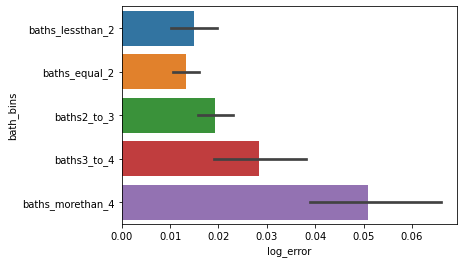

In [71]:
sns.barplot(x='log_error',y='bath_bins', data =train)

In [72]:
train.bath_bins.value_counts()

baths_equal_2       12252
baths2_to_3          8205
baths_lessthan_2     5838
baths3_to_4          1680
baths_morethan_4     1260
Name: bath_bins, dtype: int64

In [74]:
stat, p_value = stats.levene(train[train.bath_bins=='baths_equal_2'].log_error, 
                             train[train.bath_bins=='baths2_to_3'].log_error,
                             train[train.bath_bins== 'baths_lessthan_2' ].log_error,
                             train[train.bath_bins== 'baths3_to_4' ].log_error,
                            train[train.bath_bins== 'baths_morethan_4' ].log_error)
stat, p_value

(50.09368398045566, 4.3634021628557404e-42)

$H_0$: Log_error means are the same for all bath types

$H_a$: Log_error means are not all equal for all bath types

In [75]:
f, p = stats.f_oneway(train[train.bath_bins=='baths_equal_2'].log_error, 
                             train[train.bath_bins=='baths2_to_3'].log_error,
                             train[train.bath_bins== 'baths_lessthan_2' ].log_error,
                             train[train.bath_bins== 'baths3_to_4' ].log_error,
                            train[train.bath_bins== 'baths_morethan_4' ].log_error)
f, p

(16.225663834611154, 2.790422071061611e-13)

**We faill to reject the null hypothesis. Therefore there is enough evidence to suggest that the means of all bath types are not equal.**

# Quesion 4: Is logerror significanly different for properties above the 75% quantile sqft vs 75% and below ?

In [82]:
train.calculatedfinishedsquarefeet.describe()

count    29259.000000
mean      1916.408797
std        990.646372
min        128.000000
25%       1268.000000
50%       1658.000000
75%       2298.000000
max      18654.000000
Name: calculatedfinishedsquarefeet, dtype: float64

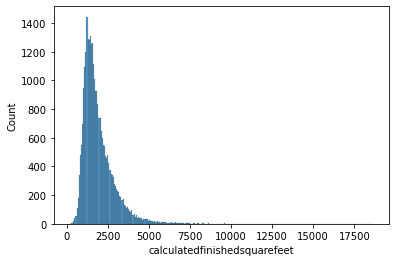

In [84]:
sns.histplot(train.calculatedfinishedsquarefeet);

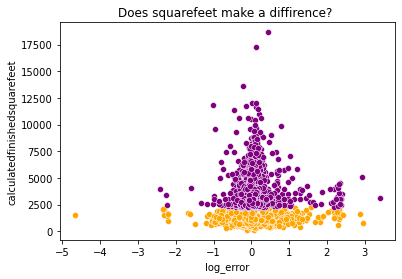

In [92]:
sns.scatterplot(y='calculatedfinishedsquarefeet', x='log_error',
                data=train[train.calculatedfinishedsquarefeet<= 2298], color='orange')

sns.scatterplot(y='calculatedfinishedsquarefeet', x='log_error',
                data=train[train.calculatedfinishedsquarefeet> 2298], 
                color='purple')

plt.title("Does squarefeet make a diffirence? ")
plt.show()

**I do not see a diffirence in log_error with current bins, if anything homes with more squarefootage seem to have less error and closer to the center. If bins were cut diffently maybe less than 5000 and more ant 5000 sqf.**

# Question 5: What continuous variables have the correlation with logerror?

In [79]:
train.columns.to_list()

['id',
 'parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',


In [80]:
sub_train = train [['basementsqft','finishedfloor1squarefeet','calculatedfinishedsquarefeet','finishedsquarefeet12',
 'finishedsquarefeet13','finishedsquarefeet15', 'finishedsquarefeet50','finishedsquarefeet6','lotsizesquarefeet','log_error']]

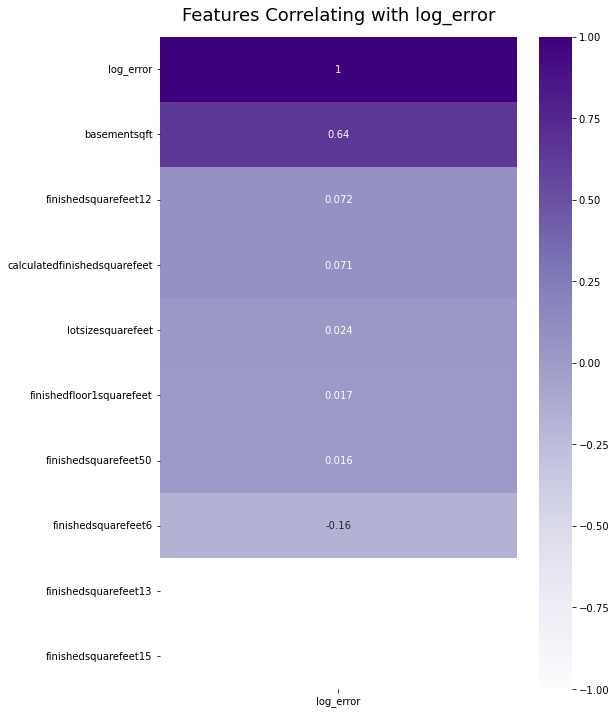

In [81]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(sub_train.corr(method='spearman')[['log_error']].sort_values(by='log_error', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Purples')
heatmap.set_title('Features Correlating with log_error', fontdict={'fontsize':18}, pad=16);

# Question 6: Is there more log_error in Older homes?


In [90]:
train.yearbuilt.describe()

count    29244.000000
mean      1963.352893
std         23.141085
min       1880.000000
25%       1950.000000
50%       1960.000000
75%       1979.000000
max       2016.000000
Name: yearbuilt, dtype: float64

<AxesSubplot:xlabel='yearbuilt', ylabel='Count'>

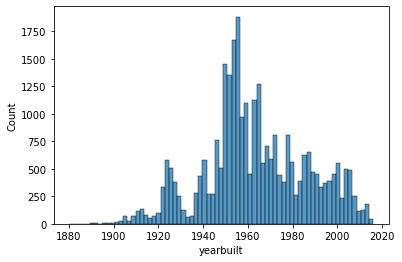

In [91]:
sns.histplot(train.yearbuilt)

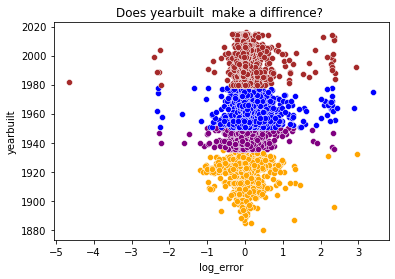

In [97]:
sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[train.yearbuilt<= 1935], color='orange')

sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[(train.yearbuilt> 1935) & (train.yearbuilt<=1950)], 
                color='purple')
sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[(train.yearbuilt> 1950) & (train.yearbuilt<1979)], 
                color='blue')
sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[train.yearbuilt>1979], 
                color='brown')

plt.title("Does yearbuilt  make a diffirence? ")
plt.show()

**Yearbuilt does not seem to be an indicator of log_error with current bins. There is error in all ages more so in the years 1940 and above. Maybe if bins where distributed diffirently could lead to new discovery**